In [1]:
d = 30
D = 120
r = 3
m_1 = 0
X =10^10
PARA = 100

In [2]:
# Parameters
d = -29
D = -116
r = 2
m_1 = 0
h = 6
X = "10^10"
PARA = 100


In [3]:
PRIME_TABLE_SIZE = 10^8
int_X = sage_eval(X)
K.<a> = NumberField(x^2 - d)
co_loglog = float((2^(r-1) - 1)/2 + m_1)
H = K.class_number()
h = K.narrow_class_group().order()
narrow = 0
if (H != h):
    narrow = 1

In [4]:
import struct
import urllib.request
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
@parallel(PARA)
def plot_points_create(prime_table_segment):
    
    plot_points = []
    
    prime_table_name = 'prime_' + str(prime_table_segment)
    prime_table_target_url = "https://s3ds.mdx.jp/prime_tables/" + prime_table_name
    prime_table_obj = urllib.request.urlopen(prime_table_target_url)
    prime_binary = prime_table_obj.read()  
    table_size = len(prime_binary)/8
    
    prime_tmp = 0
    
    for i in range(0,table_size):
        prime = int.from_bytes(prime_binary[8*i:8*i+8], byteorder='big')  

        if prime_table_segment == 0:
             if (prime - prime_tmp)  > (10^(len(str(prime)) - 2)) :
                plot_points.append(prime)
                prime_tmp = prime
        else:
            if (prime - prime_tmp)  > (10^(len(str(prime)) - 3)) :
                plot_points.append(prime)
                prime_tmp = prime
                
        if i == (table_size -1):
            plot_points.append(prime)
    
    return plot_points

In [6]:
plot_points = list(plot_points_create(list(range(0,int_X/PRIME_TABLE_SIZE))))
plot_points.sort()

In [7]:
rp_list = [] 
plot_list_r_p = [[] for i in range(int_X/PRIME_TABLE_SIZE)]

weighted_sum_r_p = 0.0
    
n = 0
    
prime_table_name = 'prime_0'
prime_table_target_url = "https://s3ds.mdx.jp/prime_tables/" + prime_table_name
prime_table_obj = urllib.request.urlopen(prime_table_target_url)
prime_binary = prime_table_obj.read()  
table_size = len(prime_binary)/8
    


for i in range(0,table_size):
    prime = int.from_bytes(prime_binary[8*i:8*i+8], byteorder='big')    
        
    I = K.ideal(prime)
    F = I.factor()
    len_F = len(F)
    ramified = F[0][1]
    norm = F[0][0].absolute_norm()
        
    if (len_F == 1) & (ramified ==1):
        rp_list.append(prime)

prime_table_obj.close()

In [8]:
m = 0
print(len(rp_list), rp_list[0:100])
    
for j in range(0, int_X/PRIME_TABLE_SIZE):
    print(j,m,rp_list[m], len(plot_points[j][1]))
    for k in range(0, len(plot_points[j][1])):
        if rp_list[m]^2 >= plot_points[j][1][k]:
            plot_list_r_p[j].append([plot_points[j][1][k], weighted_sum_r_p])
            if m == (len(plot_points[j][1]) -1):
                break
                
        else:
            while rp_list[m]^2 < plot_points[j][1][k]:
                weighted_sum_r_p = weighted_sum_r_p + float(1/rp_list[m])
                m = m + 1
                if m == (len(plot_points[j][1])):
                    break
            plot_list_r_p[j].append([plot_points[j][1][k], weighted_sum_r_p])

2881304 [7, 17, 23, 37, 41, 59, 61, 67, 71, 73, 83, 89, 97, 101, 103, 107, 113, 137, 139, 151, 157, 167, 179, 193, 199, 223, 227, 229, 239, 269, 283, 293, 317, 337, 347, 383, 389, 409, 419, 421, 431, 433, 439, 449, 461, 463, 487, 499, 523, 541, 547, 569, 571, 577, 587, 601, 617, 631, 641, 643, 647, 653, 677, 683, 691, 719, 733, 757, 769, 773, 787, 797, 809, 811, 829, 853, 863, 881, 883, 919, 991, 997, 1013, 1019, 1031, 1033, 1039, 1051, 1061, 1103, 1117, 1129, 1151, 1181, 1201, 1223, 1229, 1231, 1237, 1249]
0 0 7 525
1 631 10037 101
2 855 14143 101
3 1016 17321 101
4 1142 20011 101
5 1263 22369 101
6 1367 24499 101
7 1466 26489 101
8 1544 28289 101
9 1629 30011 101
10 1706 31643 11
11 1788 33199 11
12 1855 34651 11
13 1911 36061 11
14 1980 37423 11
15 2038 38767 11
16 2098 40009 11
17 2155 41243 11
18 2219 42437 11
19 2270 43591 11
20 2329 44729 11
21 2378 45827 11
22 2434 46933 11
23 2482 47969 11
24 2528 49003 11
25 2577 50033 11
26 2619 50993 11
27 2673 51991 11
28 2712 52919 11
29 

In [9]:
@parallel(PARA)
def list_create(prime_table_segment):
    
    global plot_points, narrow
    
    points = plot_points[prime_table_segment][1]
    
    plot_list = []

    weighted_sum = 0.0
    weighted_sum_spl = 0.0
    weighted_sum_pri = 0.0
    weighted_sum_ramified = 0.0

    
    n = 0
    
    prime_table_name = 'prime_' + str(prime_table_segment)
    prime_table_target_url = "https://s3ds.mdx.jp/prime_tables/" + prime_table_name
    prime_table_obj = urllib.request.urlopen(prime_table_target_url)
    prime_binary = prime_table_obj.read()  
    table_size = len(prime_binary)/8
    


    for i in range(0,table_size):
        prime = int.from_bytes(prime_binary[8*i:8*i+8], byteorder='big')    
        
        I = K.ideal(prime)
        F = I.factor()
        len_F = len(F)
        ramified = F[0][1]
        norm = F[0][0].absolute_norm()
        
        if not ((len_F == 1) & (ramified ==1)):
            weighted_sum = weighted_sum + float(len_F*(1/sqrt(norm)))

        if (len_F > 1) & (ramified ==1) :
            weighted_sum_spl = weighted_sum_spl + float(len_F*(1/sqrt(norm)))
            if F[0][0].is_principal():
                if narrow == 0:
                    weighted_sum_pri = weighted_sum_pri + float(len_F*(1/sqrt(norm)))
                else:
                    conj_list = F[0][0].gens_reduced()[0].galois_conjugates(K)
                    if (conj_list[0]*conj_list[1] > 0):
                        weighted_sum_pri = weighted_sum_pri + float(len_F*(1/sqrt(norm)))
        if (len_F == 1) & (ramified > 1) :
            weighted_sum_ramified = weighted_sum_ramified + float(len_F*(1/sqrt(norm)))
            
        if prime == points[n]:
            weighted_sum_r_p = plot_list_r_p[prime_table_segment][n][1]
            plot_list.append([points[n], weighted_sum, weighted_sum_spl, weighted_sum_pri, weighted_sum_r_p,weighted_sum_ramified])
            n = n + 1
    prime_table_obj.close()
    return(plot_list)

In [10]:
plot_list = list(list_create(list(range(0,int_X/PRIME_TABLE_SIZE))))
plot_list.sort()

In [11]:
offset= [0.0,0.0,0.0,0.0,0.0, 0.0]
for l in range(0,int_X/PRIME_TABLE_SIZE):
    for m in range(0, len(plot_list[l][1])):
        for n in [1 ,2, 3, 5]:
            plot_list[l][1][m][n] = plot_list[l][1][m][n] + offset[n]
    for n in [1 ,2, 3, 5]:
        offset[n] = plot_list[l][1][m][n]

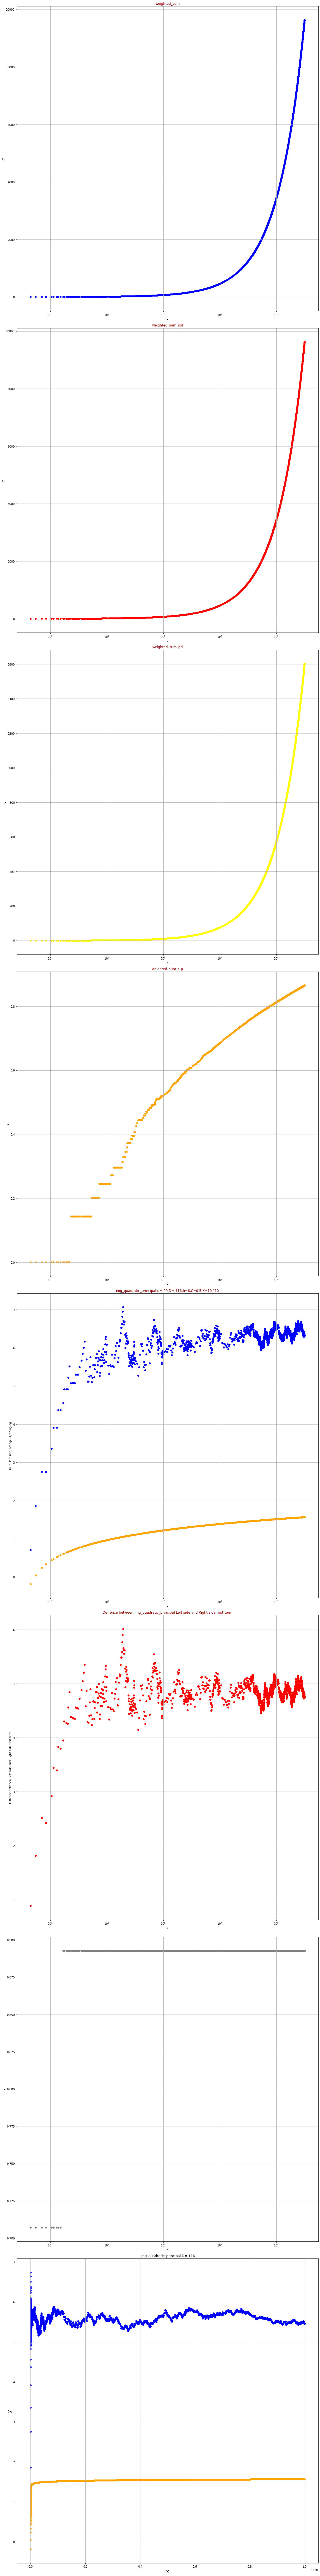

In [12]:
"""
bias against pricipal ideal (img_quadratic_principal)
"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots(8, 1, tight_layout=True, figsize=(16, 16*8))

plt.xlabel('X',fontsize=18)
plt.ylabel('Y',fontsize=18)
plt.title('img_quadratic_principal D=' + str(D))

for k in range(8):
    ax[k].set_xscale('log')
    ax[k].grid(which="both") # グリッド表示。"both"はxy軸両
    ax[k].set_xlabel("x")
    ax[k].set_ylabel("y")

ax[7].set_xscale('linear')

ylabel_str = "blue: left side, " + "orange: " + str((2^(r-1) - 1)/2 + m_1) +" *loglog"
ax[4].set_ylabel(ylabel_str)
ax[5].set_ylabel("Diffence between Left side and Right side first term")

ax[0].set_title("weighted_sum", c="darkred", size="large")
ax[1].set_title("weighted_sum_spl", c="darkred", size="large")
ax[2].set_title("weighted_sum_pri", c="darkred", size="large")
ax[3].set_title("weighted_sum_r_p", c="darkred", size="large")
title_str ="img_quadratic_principal:" + "d=" + str(d) + "," + "D=" + str(D) + "," + "h=" + str(H) + "," + "C=" + str(co_loglog) + "," +"X=" + str(X) 
ax[4].set_title(title_str, c="darkred", size="large")
ax[5].set_title("Deffence between img_quadratic_principal Left side and Right side first term", c="darkred", size="large")

for i in range(0,int_X/PRIME_TABLE_SIZE):
    for j in range(0,len(plot_list[i][1])):
        ax[0].scatter(plot_list[i][1][j][0], plot_list[i][1][j][1], color="blue")
        ax[1].scatter(plot_list[i][1][j][0], plot_list[i][1][j][2], color="red")
        ax[2].scatter(plot_list[i][1][j][0], plot_list[i][1][j][3], color="yellow")
        ax[3].scatter(plot_list[i][1][j][0], plot_list[i][1][j][4], color="orange") 
        ax[4].scatter(plot_list[i][1][j][0], plot_list[i][1][j][1]+plot_list[i][1][j][4] - h*plot_list[i][1][j][3] - h*plot_list[i][1][j][4], color="blue") 
        ax[4].scatter(plot_list[i][1][j][0],  co_loglog*float(log(log(plot_list[i][1][j][0]))), color="orange") 
        ax[5].scatter(plot_list[i][1][j][0], plot_list[i][1][j][1]+plot_list[i][1][j][4] - h*plot_list[i][1][j][3] - h*plot_list[i][1][j][4] - co_loglog*float(log(log(plot_list[i][1][j][0]))) , color="red")
        ax[6].scatter(plot_list[i][1][j][0], plot_list[i][1][j][5] , color="gray")

        ax[7].scatter(plot_list[i][1][j][0], plot_list[i][1][j][1] - h*plot_list[i][1][j][3] - h*plot_list[i][1][j][4], color="blue") 
        ax[7].scatter(plot_list[i][1][j][0],  co_loglog*float(log(log(plot_list[i][1][j][0]))), color="orange") 
        
bbox = ax[4].get_tightbbox(fig.canvas.get_renderer())
file_name = "../output/"+title_str +'.png'
fig.savefig(file_name,dpi=fig.dpi,bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()))
    
plt.show()  